# Task 4 - Movie Recommendation System - IMDB 5000 Movie Data set

### Submitted by - Shivank Udayawal

## Problem Statement :

* What factors are important that make a Movie more Successful than others. So, we would like to analyze what kind of movies are more successful, in other words, get higher IMDB score.

* Building a Recommendation System

## About Dataset :

* Dataset contains 28 variables for 5043 Movies, spanning across 100 years in 66 Countries. 
* There are 2399 unique Director Names & Thousands of actors/actresses. 
* “imdb_score” is the Response Variable while the other 27 variables are Possible Predictors.

### Variable Name & Description

   1. color: Film colorization. -> ‘Black and White’ or ‘Color’
   2. director_name: Name of the Director of the Movie
   3. num_critic_for_reviews: Number of critical reviews on imdb
   4. duration: Duration in minutes
   5. director_facebook_likes: Number of likes of the Director on his Facebook Page
   6. actor_3_facebook_likes: Number of likes of the Actor_3 on his/her Facebook Page
   7. actor_2_name: Other actor starring in the movie
   8. actor_1_facebook_likes: Number of likes of the Actor_1 on his/her Facebook Page
   9. gross: Gross earnings of the movie in Dollars
   10. genres: Film categorization like ‘Animation’, ‘Comedy’, ‘Romance’, ‘Horror’, ‘Sci-Fi’, ‘Action’, ‘Family’
   11. actor_1_name: Primary actor starring in the movie
   12. movie_title: Title of the Movie
   13. num_voted_users: Number of people who voted for the movie
   14. cast_total_facebook_likes: Total number of facebook likes of the entire cast of the movie
   15. actor_3_name: Other actor starring in the movie
   16. facenumber_in_poster: Number of the actor who featured in the movie poster
   17. plot_keywords: Keywords describing the movie plot
   18. movie_imdb_link: IMDB link of the movie
   19. num_user_for_reviews: Number of users who gave a review
   20. language: English, Arabic, Chinese, French, German, Danish, Italian, Japanese etc
   21. country: Country where the movie is produced
   22. content_rating: Content rating of the movie
   23. budget: Budget of the movie in Dollars
   24. title_year: The year in which the movie is released (1916:2016)
   25. actor_2_facebook_likes: Number of likes of the Actor_2 on his/her Facebook Page
   26. imdb_score: IMDB Score of the movie on IMDB
   27. movie_facebook_likes: Number of Facebook likes in the movie page
   28. aspect_ratio: Aspect ratio the movie was made in


## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py

import warnings
warnings.filterwarnings("ignore")

## Reading the Data

In [2]:
Data = pd.read_csv("movie_metadata.csv")

In [3]:
Data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
Data.shape

(5043, 28)

## Summary of Data

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [6]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,4993.0,1.401943e+02,1.216017e+02,1.00,50.00,110.00,195.00,8.130000e+02
duration,5028.0,1.072011e+02,2.519744e+01,7.00,93.00,103.00,118.00,5.110000e+02
director_facebook_likes,4939.0,6.865092e+02,2.813329e+03,0.00,7.00,49.00,194.50,2.300000e+04
actor_3_facebook_likes,5020.0,6.450098e+02,1.665042e+03,0.00,133.00,371.50,636.00,2.300000e+04
actor_1_facebook_likes,5036.0,6.560047e+03,1.502076e+04,0.00,614.00,988.00,11000.00,6.400000e+05
gross,4159.0,4.846841e+07,6.845299e+07,162.00,5340987.50,25517500.00,62309437.50,7.605058e+08
num_voted_users,5043.0,8.366816e+04,1.384853e+05,5.00,8593.50,34359.00,96309.00,1.689764e+06
cast_total_facebook_likes,5043.0,9.699064e+03,1.816380e+04,0.00,1411.00,3090.00,13756.50,6.567300e+05
facenumber_in_poster,5030.0,1.371173e+00,2.013576e+00,0.00,0.00,1.00,2.00,4.300000e+01
num_user_for_reviews,5022.0,2.727708e+02,3.779829e+02,1.00,65.00,156.00,326.00,5.060000e+03


## Total Unique Value

In [7]:
Data.nunique()

color                           2
director_name                2398
num_critic_for_reviews        528
duration                      191
director_facebook_likes       435
actor_3_facebook_likes        906
actor_2_name                 3032
actor_1_facebook_likes        878
gross                        4035
genres                        914
actor_1_name                 2097
movie_title                  4917
num_voted_users              4826
cast_total_facebook_likes    3978
actor_3_name                 3521
facenumber_in_poster           19
plot_keywords                4760
movie_imdb_link              4919
num_user_for_reviews          954
language                       47
country                        65
content_rating                 18
budget                        439
title_year                     91
actor_2_facebook_likes        917
imdb_score                     78
aspect_ratio                   22
movie_facebook_likes          876
dtype: int64

## Total Missing Values

In [8]:
total_missing = Data.isnull().sum()
percentge = total_missing/Data.isnull().count()
NAs = pd.concat([total_missing, percentge*100], axis = 1, keys = ('Total','Percentge(%)'))
NAs[NAs.Total>0].sort_values(by = 'Total', ascending = False)

,Total,Percentge(%)
gross,884,17.529248
budget,492,9.756098
aspect_ratio,329,6.523895
content_rating,303,6.008328
plot_keywords,153,3.033908
title_year,108,2.141582
director_name,104,2.062265
director_facebook_likes,104,2.062265
num_critic_for_reviews,50,0.991473
actor_3_name,23,0.456078


* There are many null values present in our dataset.

## Exploratory Data Analysis

### Univariate Analysis

###   1. Color

In [9]:
Data['color'].value_counts()

Color               4815
 Black and White     209
Name: color, dtype: int64

Text(0.5, 0, 'color')

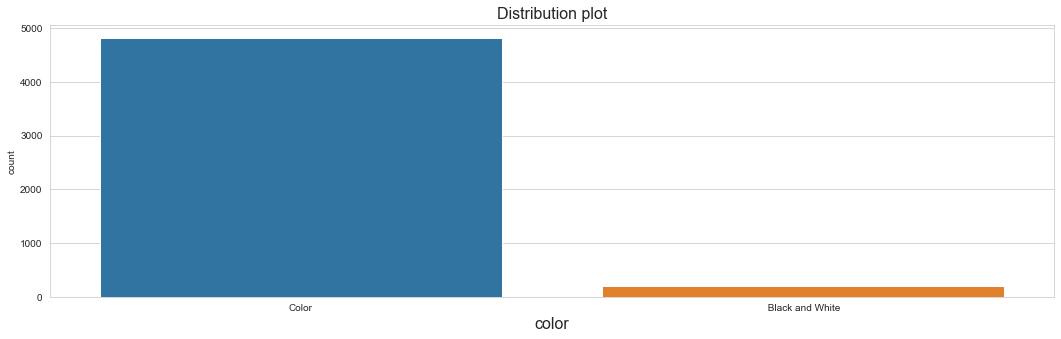

In [10]:
sns.set_style("whitegrid")
plt.figure(figsize = (18,5))
sns.countplot(x = 'color', data = Data)
plt.title('Distribution plot', fontsize = 16)
plt.xlabel('color', fontsize = 16)

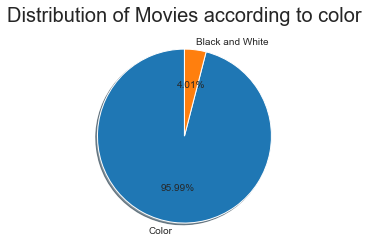

In [11]:
color = ['Color', 'Black and White'] 
data = [4815, 201]
plt.pie(data,  labels = color, autopct = "%1.2f%%", shadow = True, startangle = 90)
plt.title("Distribution of Movies according to color", fontsize = 20)
plt.show()

* Almost 96% Movies are in Color whereas only 4% are in Black & white.

### 2. Genres

In [12]:
Data['genres'].value_counts().head(15)

Drama                           236
Comedy                          209
Comedy|Drama                    191
Comedy|Drama|Romance            187
Comedy|Romance                  158
Drama|Romance                   152
Crime|Drama|Thriller            101
Horror                           71
Action|Crime|Drama|Thriller      68
Action|Crime|Thriller            65
Drama|Thriller                   64
Crime|Drama                      63
Horror|Thriller                  56
Crime|Drama|Mystery|Thriller     55
Comedy|Crime                     51
Name: genres, dtype: int64

Text(0.5, 0, 'Genres')

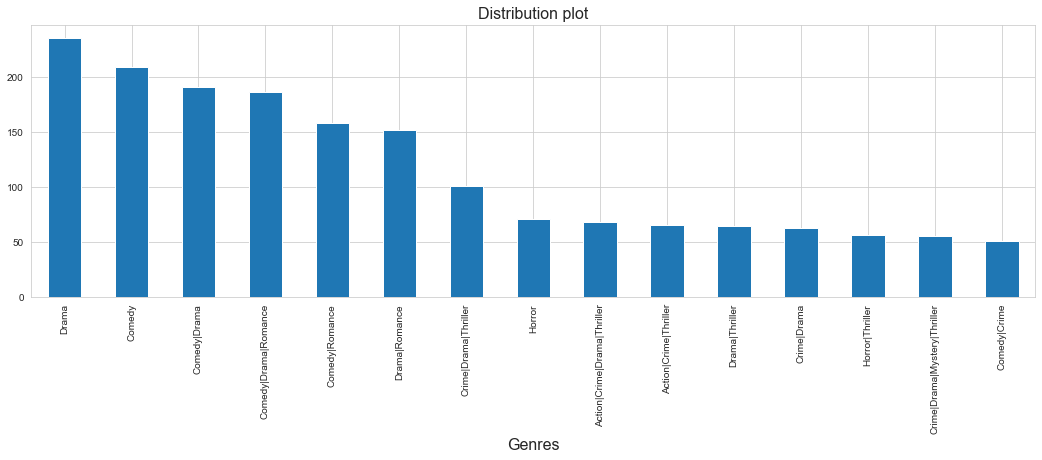

In [13]:
sns.set_style("whitegrid")
plt.figure(figsize = (18,5))
Data['genres'].value_counts()[0:15].plot.bar()
plt.title('Distribution plot', fontsize = 16)
plt.xlabel('Genres', fontsize = 16)

* Movies with Drama Genre is the mostly available in the Dataset.

### 3. Language

In [14]:
Data['language'].value_counts()

English       4704
French          73
Spanish         40
Hindi           28
Mandarin        26
German          19
Japanese        18
Cantonese       11
Russian         11
Italian         11
Korean           8
Portuguese       8
Arabic           5
Hebrew           5
Danish           5
Swedish          5
Polish           4
Persian          4
Norwegian        4
Dutch            4
Chinese          3
Thai             3
Dari             2
Romanian         2
Icelandic        2
Indonesian       2
Zulu             2
Aboriginal       2
None             2
Aramaic          1
Vietnamese       1
Filipino         1
Telugu           1
Kazakh           1
Slovenian        1
Czech            1
Urdu             1
Hungarian        1
Dzongkha         1
Panjabi          1
Kannada          1
Tamil            1
Mongolian        1
Bosnian          1
Greek            1
Swahili          1
Maya             1
Name: language, dtype: int64

Text(0.5, 0, 'Language')

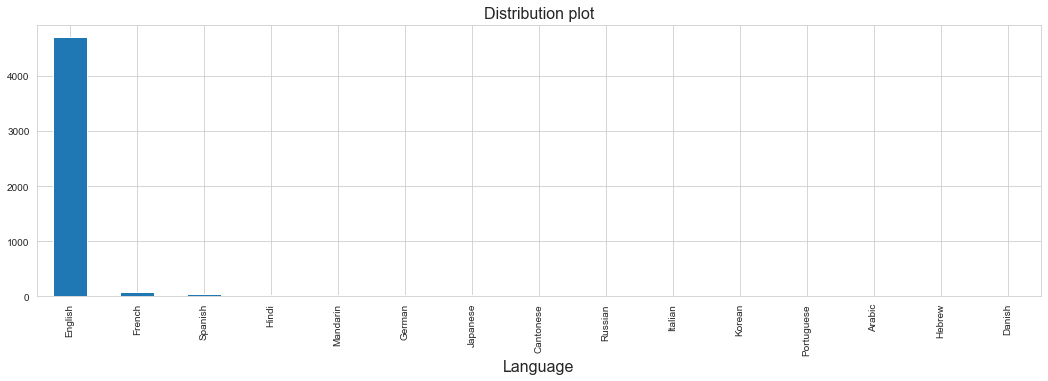

In [15]:
sns.set_style("whitegrid")
plt.figure(figsize = (18,5))
Data['language'].value_counts()[0:15].plot.bar()
plt.title('Distribution plot', fontsize = 16)
plt.xlabel('Language', fontsize = 16)

* Majority of the movies are in English language, followed by French, Spanish and Hindi.

### 4. Country

In [16]:
Data['country'].value_counts().head(15)

USA            3807
UK              448
France          154
Canada          126
Germany          97
Australia        55
India            34
Spain            33
China            30
Japan            23
Italy            23
Mexico           17
Hong Kong        17
New Zealand      15
South Korea      14
Name: country, dtype: int64

Text(0.5, 0, 'Country')

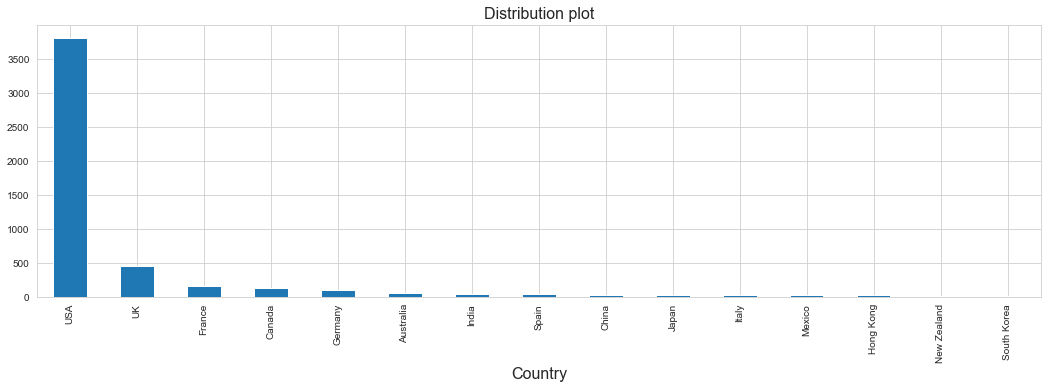

In [17]:
sns.set_style("whitegrid")
plt.figure(figsize = (18,5))
Data['country'].value_counts()[0:15].plot.bar()
plt.title('Distribution plot', fontsize = 16)
plt.xlabel('Country', fontsize = 16)

* Majority of the movies are made in USA followed by UK, France and Canada.

### 5. Budget

In [18]:
Data['budget'].mean()

39752620.436387606

### 6. IMDB Score

In [19]:
Data['imdb_score'].mean()

6.442137616498111

* Average IMDB Rating of the movie is 6.44, on a scale from 1-10.

Text(0.5, 0, 'IMDB Rating')

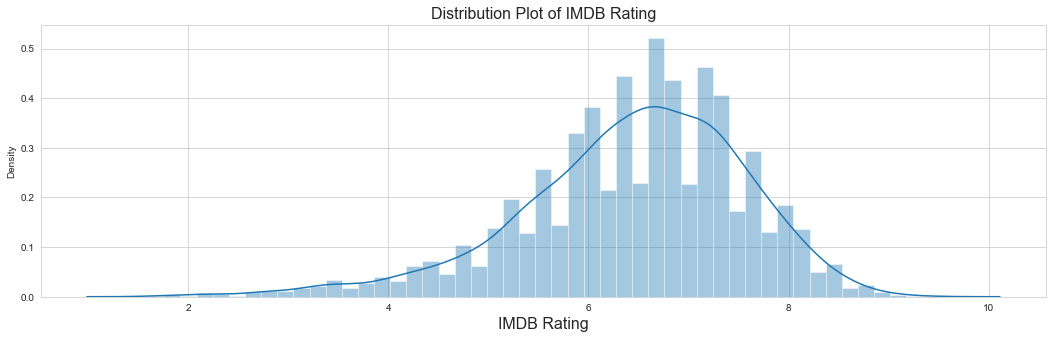

In [20]:
sns.set_style("whitegrid")
plt.figure(figsize = (18,5))
sns.distplot(Data['imdb_score'])
plt.title('Distribution Plot of IMDB Rating', fontsize = 16)
plt.xlabel('IMDB Rating', fontsize = 16)

### 7. Movie Title

In [21]:
Data['movie_title'].value_counts().head(15)

Pan                               3
The Fast and the Furious          3
King Kong                         3
Halloween                         3
Home                              3
Victor Frankenstein               3
Ben-Hur                           3
The Lovely Bones                  2
RoboCop                           2
The Return of the Living Dead     2
Conan the Barbarian               2
Disturbia                         2
Alice in Wonderland               2
The Gift                          2
TRON: Legacy                      2
Name: movie_title, dtype: int64

In [22]:
Data['title_year'].value_counts().head(15)

2009.0    260
2014.0    252
2006.0    239
2013.0    237
2010.0    230
2015.0    226
2008.0    225
2011.0    225
2005.0    221
2012.0    221
2004.0    214
2002.0    209
2007.0    204
2001.0    188
2000.0    171
Name: title_year, dtype: int64

Text(0.5, 0, 'Title Year')

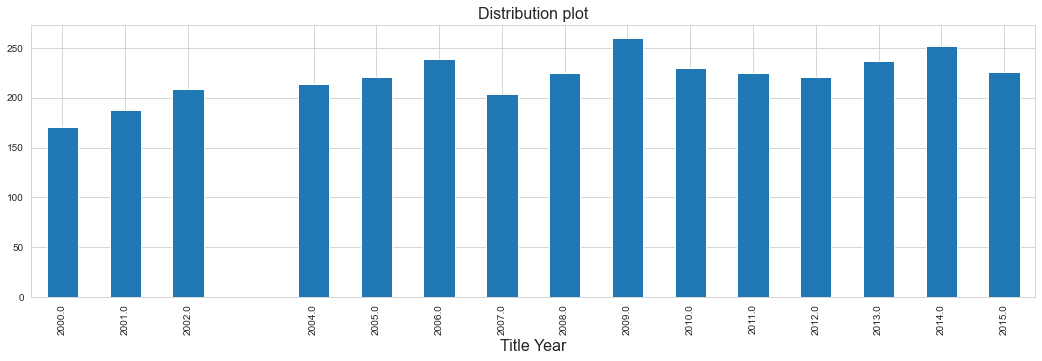

In [23]:
sns.set_style("whitegrid")
plt.figure(figsize = (18,5))
Data['title_year'].value_counts().head(15).plot.bar()
plt.title('Distribution plot', fontsize = 16)
plt.xlabel('Title Year', fontsize = 16)

In [24]:
Data['title_year'].isnull().sum()

108

In [25]:
Data['title_year'].fillna(0, inplace = True)

In [26]:
Data['title_year'] = Data['title_year'].apply(np.int64)

Text(0.5, 0, 'Title Year')

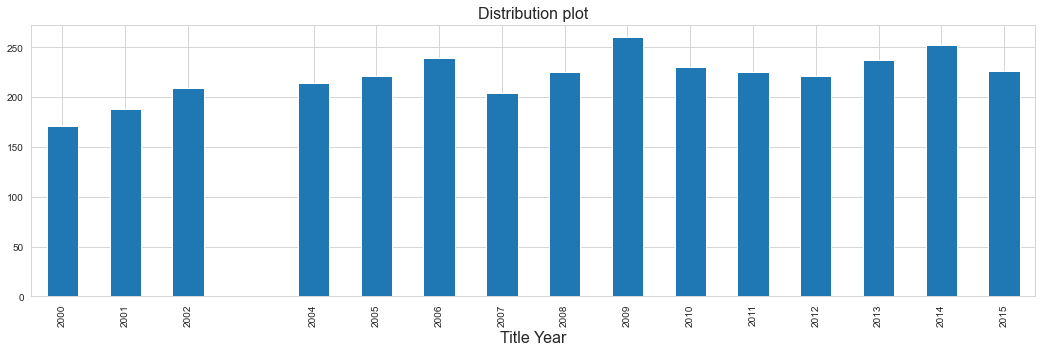

In [27]:
sns.set_style("whitegrid")
plt.figure(figsize = (18,5))
Data['title_year'].value_counts().head(15).plot.bar()
plt.title('Distribution plot', fontsize = 16)
plt.xlabel('Title Year', fontsize = 16)

* Maximum Movies were released in the year 2009.
* Second position in maximum movies were released in the year 2014.

## Movie Recommendation System

### 1.  Simple Recommender System (Based on IMDB Rating)

In [28]:
Data1 = Data.sort_values('imdb_score', ascending = False)

Data1[['movie_title', 'title_year', 'director_name', 'genres', 'language', 'imdb_score']].head(20)

,movie_title,title_year,director_name,genres,language,imdb_score
2765,Towering Inferno,0,John Blanchard,Comedy,English,9.5
1937,The Shawshank Redemption,1994,Frank Darabont,Crime|Drama,English,9.3
3466,The Godfather,1972,Francis Ford Coppola,Crime|Drama,English,9.2
4409,Kickboxer: Vengeance,2016,John Stockwell,Action,NaN,9.1
2824,Dekalog,0,NaN,Drama,Polish,9.1
3207,Dekalog,0,NaN,Drama,Polish,9.1
66,The Dark Knight,2008,Christopher Nolan,Action|Crime|Drama|Thriller,English,9.0
2837,The Godfather: Part II,1974,Francis Ford Coppola,Crime|Drama,English,9.0
3481,Fargo,0,NaN,Crime|Drama|Thriller,English,9.0
339,The Lord of the Rings: The Return of the King,2003,Peter Jackson,Action|Adventure|Drama|Fantasy,English,8.9


* This is a very Simple Movie Recommender System. 
* Here, The IMDB Rating of the Movie is taken into account and recommendation is made, based on that. 

* According to this:
   1. Towering Inferno has the Highest Rating of 9.5/10 & it is an English comedy movie.
   2. Then follows The Shawshank Redemption, The Godfather and so on.

### 2. Content Based Recommender System

* Creating a separate dataset for the recommender system.

In [29]:
Data_CB = Data[['director_name', 'actor_2_name', 'genres', 'title_year', 'actor_1_name', 'movie_title', 'actor_3_name']]

Data_CB.head()

,director_name,actor_2_name,genres,title_year,actor_1_name,movie_title,actor_3_name
0,James Cameron,Joel David Moore,Action|Adventure|Fantasy|Sci-Fi,2009,CCH Pounder,Avatar,Wes Studi
1,Gore Verbinski,Orlando Bloom,Action|Adventure|Fantasy,2007,Johnny Depp,Pirates of the Caribbean: At World's End,Jack Davenport
2,Sam Mendes,Rory Kinnear,Action|Adventure|Thriller,2015,Christoph Waltz,Spectre,Stephanie Sigman
3,Christopher Nolan,Christian Bale,Action|Thriller,2012,Tom Hardy,The Dark Knight Rises,Joseph Gordon-Levitt
4,Doug Walker,Rob Walker,Documentary,0,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,NaN


* Formatting the Genres and Movie Title Columns.

In [30]:
Data_CB['genres'] = Data_CB['genres'].apply(lambda a: str(a).replace('|', ' '))
Data_CB['genres']

0       Action Adventure Fantasy Sci-Fi
1              Action Adventure Fantasy
2             Action Adventure Thriller
3                       Action Thriller
4                           Documentary
                     ...               
5038                       Comedy Drama
5039       Crime Drama Mystery Thriller
5040              Drama Horror Thriller
5041               Comedy Drama Romance
5042                        Documentary
Name: genres, Length: 5043, dtype: object

In [31]:
Data_CB['movie_title'][0]

'Avatar\xa0'

In [32]:
Data_CB['movie_title'] = Data_CB['movie_title'].apply(lambda a:a[:-1])
Data_CB['movie_title'][0]

'Avatar'

* Combined Features on which we will calculate Cosine Similarity

In [33]:
Data_CB['director_genre_actors'] = Data_CB['director_name']+' '+Data_CB['actor_1_name']+' '+' '+Data_CB['actor_2_name']+' '+Data_CB['actor_3_name']+' '+Data_CB['genres']

In [34]:
Data_CB.head()

,director_name,actor_2_name,genres,title_year,actor_1_name,movie_title,actor_3_name,director_genre_actors
0,James Cameron,Joel David Moore,Action Adventure Fantasy Sci-Fi,2009,CCH Pounder,Avatar,Wes Studi,James Cameron CCH Pounder Joel David Moore We...
1,Gore Verbinski,Orlando Bloom,Action Adventure Fantasy,2007,Johnny Depp,Pirates of the Caribbean: At World's End,Jack Davenport,Gore Verbinski Johnny Depp Orlando Bloom Jack...
2,Sam Mendes,Rory Kinnear,Action Adventure Thriller,2015,Christoph Waltz,Spectre,Stephanie Sigman,Sam Mendes Christoph Waltz Rory Kinnear Steph...
3,Christopher Nolan,Christian Bale,Action Thriller,2012,Tom Hardy,The Dark Knight Rises,Joseph Gordon-Levitt,Christopher Nolan Tom Hardy Christian Bale Jo...
4,Doug Walker,Rob Walker,Documentary,0,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN


In [35]:
Data_CB.isnull().sum()

director_name            104
actor_2_name              13
genres                     0
title_year                 0
actor_1_name               7
movie_title                0
actor_3_name              23
director_genre_actors    124
dtype: int64

In [36]:
Data_CB.fillna('', inplace = True)

In [37]:
Data_CB.isnull().sum()

director_name            0
actor_2_name             0
genres                   0
title_year               0
actor_1_name             0
movie_title              0
actor_3_name             0
director_genre_actors    0
dtype: int64

### Cosine Similarity :

* Using the Cosine Similarity to calculate a Numeric Quantity that denotes the similarity between two movies. 
* Use the cosine similarity score since it is independent of magnitude and is relatively easy and fast to calculate. 

* Vectorizing and then Calculating Cosine Similarity

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

vec = CountVectorizer()
vec_matrix = vec.fit_transform(Data_CB['director_genre_actors'])

similarity = cosine_similarity(vec_matrix)

In [39]:
def recommend_movie(movie):
    if movie not in Data_CB['movie_title'].unique():
        return('Sorry! The movie you requested is not in our Database. Please check the spelling or try with some other movies')
    else:
        i = Data_CB.loc[Data_CB['movie_title'] == movie].index[0]
        lst = list(enumerate(similarity[i]))
        lst = sorted(lst, key = lambda x:x[1] ,reverse=True)
        lst = lst[1:11] 
        l = []
        year = []
        for i in range(len(lst)):
            a = lst[i][0]
            l.append(Data_CB['movie_title'][a])
            year.append(Data_CB['title_year'][a])
            
        plt.figure(figsize = (10,5))
        plt.bar(l, [i[1] for i in lst])
        plt.xticks(rotation = 90)
        plt.xlabel('Movies similar to → '+movie, fontsize = 12, fontweight = "bold")
        plt.ylabel('cosine scores', fontsize = 12, fontweight = "bold")
        plt.show()
        df2 = pd.DataFrame({'Movies Recommended':l, 'Year':year})
        df2.drop_duplicates
        return df2

In [40]:
Data_CB['movie_title'].sample(10)

3268                                        Volver
3704                                      The Gift
923                             Me, Myself & Irene
1292                                    Get Carter
2222                                  The Bank Job
4758                         Detention of the Dead
4762                                     Good Kill
4730                             The Station Agent
4004                                   Pootie Tang
2548    The Texas Chainsaw Massacre: The Beginning
Name: movie_title, dtype: object

<Figure size 2520x720 with 0 Axes>

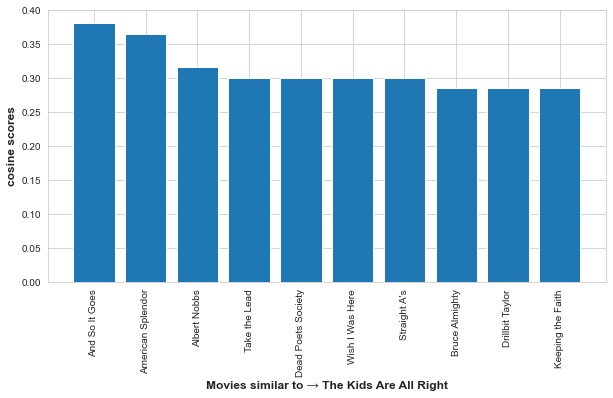

,Movies Recommended,Year
0,And So It Goes,2014
1,American Splendor,2003
2,Albert Nobbs,2011
3,Take the Lead,2006
4,Dead Poets Society,1989
5,Wish I Was Here,2014
6,Straight A's,2013
7,Bruce Almighty,2003
8,Drillbit Taylor,2008
9,Keeping the Faith,2000


In [41]:
plt.figure(figsize = (35,10))
recommend_movie('The Kids Are All Right')

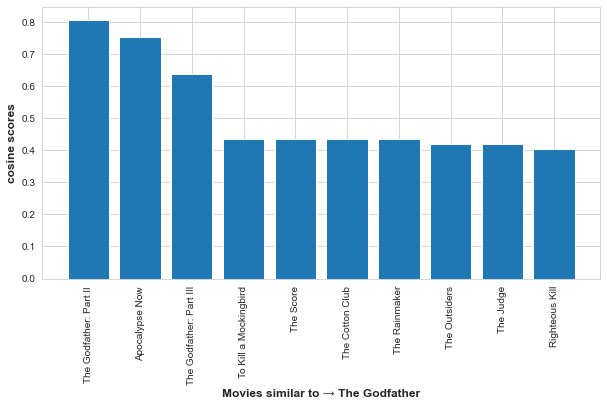

,Movies Recommended,Year
0,The Godfather: Part II,1974
1,Apocalypse Now,1979
2,The Godfather: Part III,1990
3,To Kill a Mockingbird,1962
4,The Score,2001
5,The Cotton Club,1984
6,The Rainmaker,1997
7,The Outsiders,1983
8,The Judge,2014
9,Righteous Kill,2008


In [42]:
recommend_movie('The Godfather')

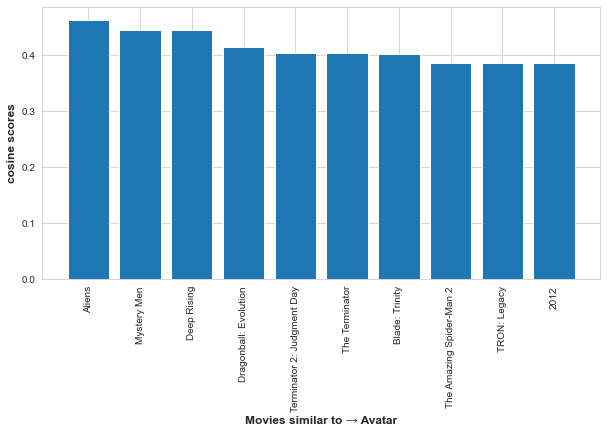

,Movies Recommended,Year
0,Aliens,1986
1,Mystery Men,1999
2,Deep Rising,1998
3,Dragonball: Evolution,2009
4,Terminator 2: Judgment Day,1991
5,The Terminator,1984
6,Blade: Trinity,2004
7,The Amazing Spider-Man 2,2014
8,TRON: Legacy,2010
9,2012,2009


In [43]:
recommend_movie('Avatar')

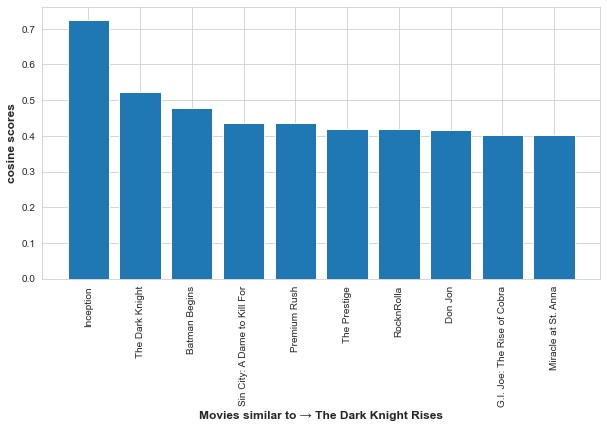

,Movies Recommended,Year
0,Inception,2010
1,The Dark Knight,2008
2,Batman Begins,2005
3,Sin City: A Dame to Kill For,2014
4,Premium Rush,2012
5,The Prestige,2006
6,RocknRolla,2008
7,Don Jon,2013
8,G.I. Joe: The Rise of Cobra,2009
9,Miracle at St. Anna,2008


In [44]:
recommend_movie('The Dark Knight Rises')

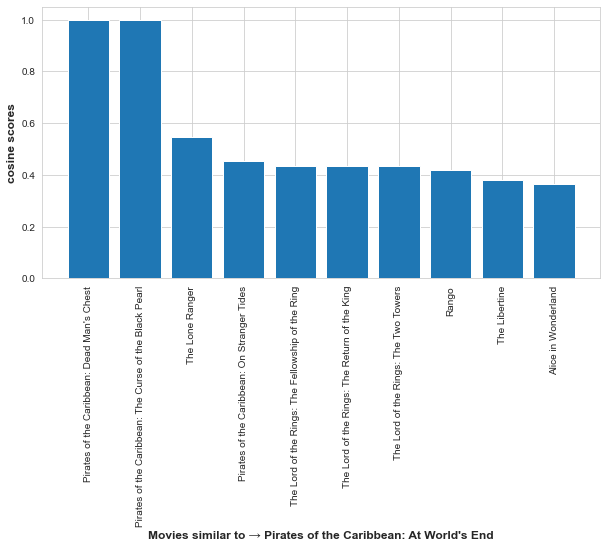

,Movies Recommended,Year
0,Pirates of the Caribbean: Dead Man's Chest,2006
1,Pirates of the Caribbean: The Curse of the Bla...,2003
2,The Lone Ranger,2013
3,Pirates of the Caribbean: On Stranger Tides,2011
4,The Lord of the Rings: The Fellowship of the Ring,2001
5,The Lord of the Rings: The Return of the King,2003
6,The Lord of the Rings: The Two Towers,2002
7,Rango,2011
8,The Libertine,2004
9,Alice in Wonderland,2010


In [45]:
recommend_movie("Pirates of the Caribbean: At World's End")